In [1]:
from utils.recorder import Recorder
from sorting.merge_sort import merge_sort
from sorting.merge_sort_iterative import merge_sort_iterative
from sorting.quick_sort import quick_sort
from sorting.quick_sort_3way import quick_sort_3way
from sorting.selection_sort import selection_sort
from sorting.insertion_sort import insert_sort_optimized
from sorting.insertion_sort import insert_sort
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
from threading import Thread

recorder = Recorder()
start, end, step = 100, 2000, 200

for x in range(start,end, step):
    data = list(np.random.randint(x, size=(x,1)))

    p1 = Thread(target=recorder.execute, args=(selection_sort, data))
    p2 = Thread(target=recorder.execute, args=(insert_sort, data))
    p3 = Thread(target=recorder.execute, args=(insert_sort_optimized, data))
    p4 = Thread(target=recorder.execute, args=(merge_sort, data, [0, len(data)-1]))
    p6 = Thread(target=recorder.execute, args=(quick_sort, data, [0, len(data)-1]))
    p7 = Thread(target=recorder.execute, args=(quick_sort_3way, data, [0, len(data)-1]))

    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p6.start()
    p7.start()

    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p6.join()
    p7.join()

In [3]:
import pandas as pd

total_result = {}
record = recorder.get_record()

for k, v in record.items():
    total_result[k] = v['sec']


df = pd.DataFrame.from_dict(total_result)
index = [f'{i}' for i in range(start, end, step)]
df.index = index
df


,selection_sort,insert_sort,insert_sort_optimized,merge_sort,quick_sort,quick_sort_3way
100,0.004999,0.002999,0.002003,0.000000,0.001003,0.001999
300,0.053002,0.028003,0.018996,0.002998,0.003003,0.005999
500,0.190006,0.166999,0.134998,0.004998,0.004997,0.010001
700,0.468995,0.306000,0.329999,0.007004,0.007996,0.014004
900,0.751007,0.621003,0.492995,0.010002,0.013001,0.051005
1100,1.119998,0.795005,0.889997,0.012997,0.013001,0.123001
1300,1.534003,1.156997,1.027000,0.079001,0.067992,0.043002
1500,2.022998,1.722004,1.397004,0.033998,0.177999,0.240005
1700,2.659551,2.148539,1.400542,0.085996,0.039005,0.102997
1900,3.248000,2.491997,2.227997,0.043002,0.044999,0.158001


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


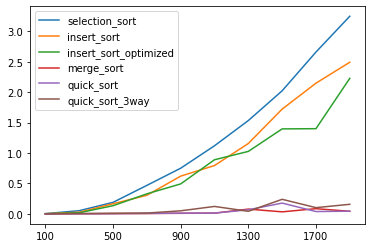

In [4]:
import matplotlib.pyplot as plt

df.plot()
plt.show()